## CSCI-5800 |  BMS Lab08- Analyze the temperature-resistance dependency 🧪
<h5>Done by Sundeep Dayalan (03-29-2024)</h5>

> **See Also**: To refer full code, visit [GitHub Code](https://github.com/Sundeep-D/Battery-management-System-Labs).

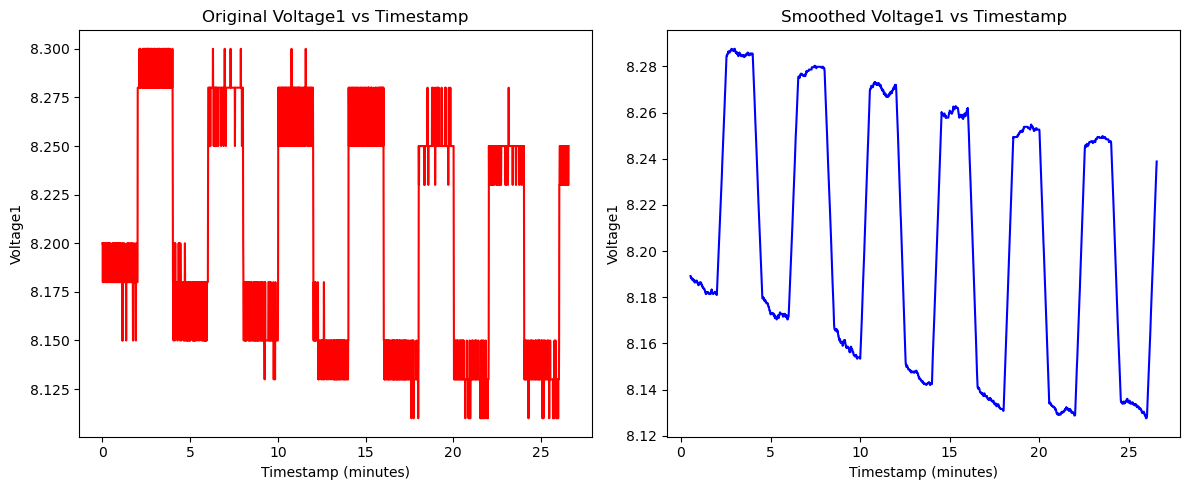

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Apply a rolling mean to smooth the 'Voltage1' data
window_size = 50  # Increase the window size for more smoothing
df['Voltage1_smoothed'] = df['Voltage1'].rolling(window=window_size).mean()

# Store the smoothed data in a variable with 'Timestamp', 'Voltage1_smoothed', and 'Circuit' columns
smoothed_data = df[['Timestamp', 'Voltage1_smoothed', 'Circuit', 'Temperature']]  # Include 'Temperature'

# Plot the original data and the smoothed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Voltage1'], label='Original Voltage1', color='red')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Original Voltage1 vs Timestamp')

plt.subplot(1, 2, 2)
plt.plot(smoothed_data['Timestamp'], smoothed_data['Voltage1_smoothed'], label='Smoothed Voltage1', color='blue')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Smoothed Voltage1 vs Timestamp')

plt.tight_layout()
plt.show()

# Write the smoothed data including 'Temperature' to a new CSV file
smoothed_data.to_csv('smoothed_LOG.csv', index=False)


185
8.1822
8.2844
556
8.1704
8.275
926
8.154
8.269799999999998
1297
8.1424
8.2602
1667
8.1316
8.2494
2035
8.1292
8.2448
2405
8.1276
8.2388


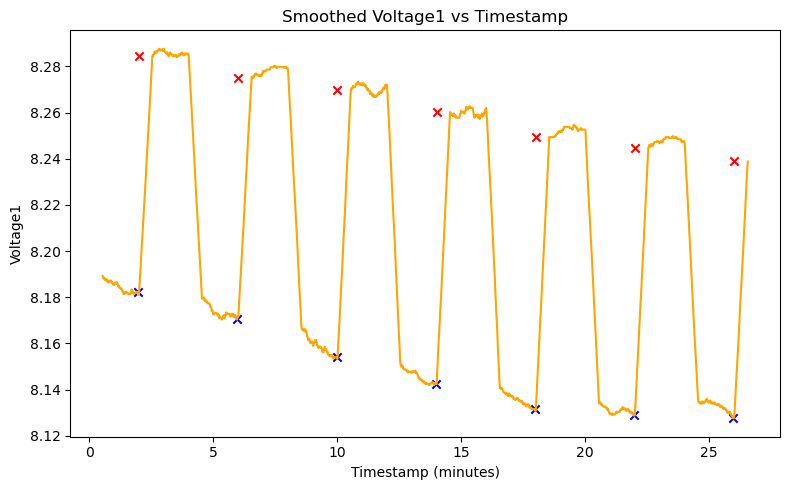

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'smoothed_data' is already defined or loaded from previous code

# Identify the points where 'Circuit' changes from 'Closed' to 'Open'
change_indices = smoothed_data.index[(smoothed_data['Circuit'] == 'Open') & (smoothed_data['Circuit'].shift() == 'Closed')]
# print(change_indices)

# Plot the smoothed graph
plt.figure(figsize=(8, 5))

# Smoothed Voltage1 graph
plt.plot(smoothed_data['Timestamp'], smoothed_data['Voltage1_smoothed'], label=f'Smoothed Voltage1', color='orange')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title(f'Smoothed Voltage1 vs Timestamp')

# Iterate over change points and calculate values
for index in change_indices:
    if index >= 3 and index + 3 < len(smoothed_data):
        # Set the value for 'Closed' to -1
        print(index)
        closed_value = smoothed_data['Voltage1_smoothed'].iloc[index-5]
        print(closed_value)
        # Set the value for 'Open' to the first value + 1
        open_value = smoothed_data['Voltage1_smoothed'].iloc[index+50]
        print(open_value)
#         print(f'{closed_value:.5f},{open_value:.5f}')

        
        # Plot the values
        plt.scatter(smoothed_data['Timestamp'].iloc[index - 3], closed_value, color='b', marker='x')
        plt.scatter(smoothed_data['Timestamp'].iloc[index], open_value, color='r', marker='x')

        # Plot the first three values when the circuit is open
#         plt.scatter(smoothed_data['Timestamp'].iloc[index:index + 3].values, [open_value] * 3, color='blue', marker='x')

plt.tight_layout()
plt.show()

# Calculate Voltage Drop ∆V


> **Formula**: ΔV=V_initial − V_final


8.181399999999998,8.2844
8.1716,8.275
8.154,8.269799999999998
8.1424,8.2602
8.1308,8.2494
8.1288,8.2448
8.128,8.2388


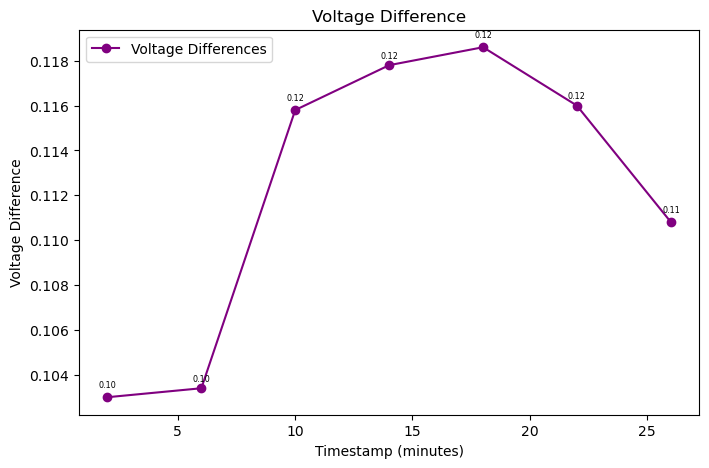

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

def printmd(string, size=2):
    display(Markdown(f'<h{size}>{string}</h{size}>'))

# Assume 'smoothed_data' is already defined or loaded from previous code

# Identify the points where 'Circuit' changes from 'Closed' to 'Open'
change_indices = smoothed_data.index[(smoothed_data['Circuit'] == 'Open') & (smoothed_data['Circuit'].shift() == 'Closed')]

# Initialize lists to store voltage differences and timestamps
voltage_differences = []
timestamps_for_differences = []

# Iterate over change points and calculate values
for index in change_indices:
    if index >= 3 and index + 3 < len(smoothed_data):
        # Set the value for 'Closed' to -1
        closed_value = smoothed_data['Voltage1_smoothed'].iloc[index-2]
        # Set the value for 'Open' to the first value + 1
        open_value = smoothed_data['Voltage1_smoothed'].iloc[index+50]
        
        # Calculate the voltage difference and append to the list
        print(f"{closed_value},{open_value}")
        voltage_difference = open_value - closed_value
        voltage_differences.append(voltage_difference)
        timestamps_for_differences.append(smoothed_data['Timestamp'].iloc[index])

# Plot the voltage differences
plt.figure(figsize=(8, 5))
plt.plot(timestamps_for_differences, voltage_differences, marker='o', linestyle='-', color='purple', label='Voltage Differences')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage Difference')
plt.title('Voltage Difference')

# Add annotations near each marker with smaller font size and closer to the marker
for i, txt in enumerate(voltage_differences):
    offset = 1 if i % 2 == 0 else -1
    plt.annotate(f'{txt:.2f}', (timestamps_for_differences[i], voltage_differences[i]), textcoords="offset points", xytext=(0, offset+6), ha='center', fontsize='xx-small')

plt.legend()
plt.show()


# Calculate Internal Resistance


> **Formula**: 𝑅=∆V / I

Processing file: 100%|██████████████████████████████████████████████████████████| 2456/2456 [00:00<00:00, 5863.20row/s]


Index Range: 0-371, ∆V: 0.10, R: 4.61Ω
Index Range: 371-742, ∆V: 0.10, R: 4.7Ω
Index Range: 742-1112, ∆V: 0.12, R: 5.21Ω
Index Range: 1112-1483, ∆V: 0.12, R: 5.28Ω
Index Range: 1483-1852, ∆V: 0.12, R: 5.31Ω
Index Range: 1852-2221, ∆V: 0.12, R: 5.22Ω
Index Range: 2221-2455, ∆V: 0.00, R: 0.0Ω


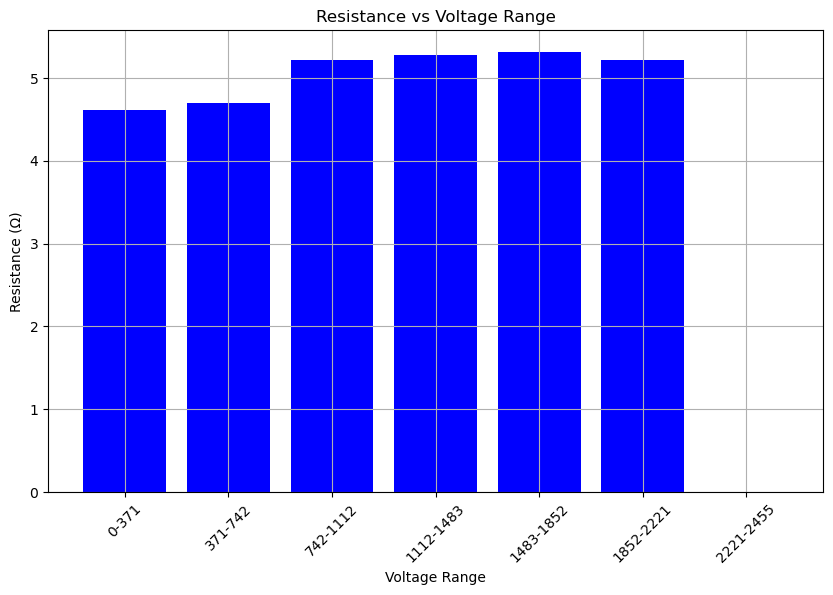

{'0-371': {'Index Range': '0-371', 'Voltage Drop': 0.10260000000000069, 'Resistance': 4.61}, '371-742': {'Index Range': '371-742', 'Voltage Drop': 0.10460000000000136, 'Resistance': 4.7}, '742-1112': {'Index Range': '742-1112', 'Voltage Drop': 0.11579999999999657, 'Resistance': 5.21}, '1112-1483': {'Index Range': '1112-1483', 'Voltage Drop': 0.11739999999999817, 'Resistance': 5.28}, '1483-1852': {'Index Range': '1483-1852', 'Voltage Drop': 0.11819999999999986, 'Resistance': 5.31}, '1852-2221': {'Index Range': '1852-2221', 'Voltage Drop': 0.11599999999999788, 'Resistance': 5.22}, '2221-2455': {'Index Range': '2221-2455', 'Voltage Drop': 0, 'Resistance': 0.0}}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

def calculateResistance(current, voltage_drop):
    current_A = current / 1000
    resistance = round((voltage_drop / current_A), 2)
    resistance = abs(resistance)
    return resistance

def calculate_voltage_difference(df, index):
    if index >= 2 and index + 2 < len(df):
        voltage_diff = df.iloc[index + 50]['Voltage1_smoothed'] - df.iloc[index - 4]['Voltage1_smoothed']
        return voltage_diff
    return 0

# Average current observed in Lab 05
current = 22.24

df = smoothed_data

# Initialize variables
start_index = None
end_index = None
checking = False
mid_reached = False
results_dict = {}

# Iterate through rows with tqdm progress bar
for index, row in tqdm(df.iterrows(), desc="Processing file", total=len(df), unit="row"):
    voltage = row['Voltage1_smoothed']
    circuit = row['Circuit']

    if circuit == 'Closed' and not checking:
        start_index = index
        checking = True
    elif circuit == 'Open' and not mid_reached:
        mid_reached = True
        voltage_diff = calculate_voltage_difference(df, index)
    elif circuit == 'Closed' and mid_reached:
        end_index = index
        mid_reached = False
        checking = True
        # Store results in the dictionary
        range_key = f"{start_index}-{end_index}"
        results_dict[range_key] = {'Index Range': range_key, 'Voltage Drop': voltage_diff, 'Resistance': calculateResistance(current, voltage_diff)}
        start_index = end_index

# If the last range is still open, store the start index without an end index
if checking:
    end_index = len(df) - 1
    voltage_diff = 0
    range_key = f"{start_index}-{end_index}"
    results_dict[range_key] = {'Index Range': range_key, 'Voltage Drop': voltage_diff, 'Resistance': calculateResistance(current, voltage_diff)}

# Print the results
for key, values in results_dict.items():
    print(f"Index Range: {values['Index Range']}, ∆V: {values['Voltage Drop']:.2f}, R: {values['Resistance']}Ω")

# Extract data for plotting
ranges = [key for key in results_dict]
resistances = [values['Resistance'] for values in results_dict.values()]
temperatures = df['Temperature'][:len(resistances)]  # Match the length of temperatures with resistances

# Plot the graph for Resistance vs Temperature
plt.figure(figsize=(10, 6))
plt.bar(ranges, resistances, color='blue')
plt.title('Resistance vs Voltage Range')
plt.xlabel('Voltage Range')
plt.ylabel('Resistance (Ω)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print(results_dict)

# Now you have the results saved in the 'results_dict' dictionary for further use.
# Update the 'R' values in the DataFrame
for key, value in results_dict.items():
    start, end = map(int, key.split('-'))
    smoothed_data.loc[start:end, 'R'] = value['Resistance']

# Save the updated DataFrame to a new CSV file
smoothed_data.to_csv('smoothed_LOG_with_R.csv', index=False)









# Scatter Plotting


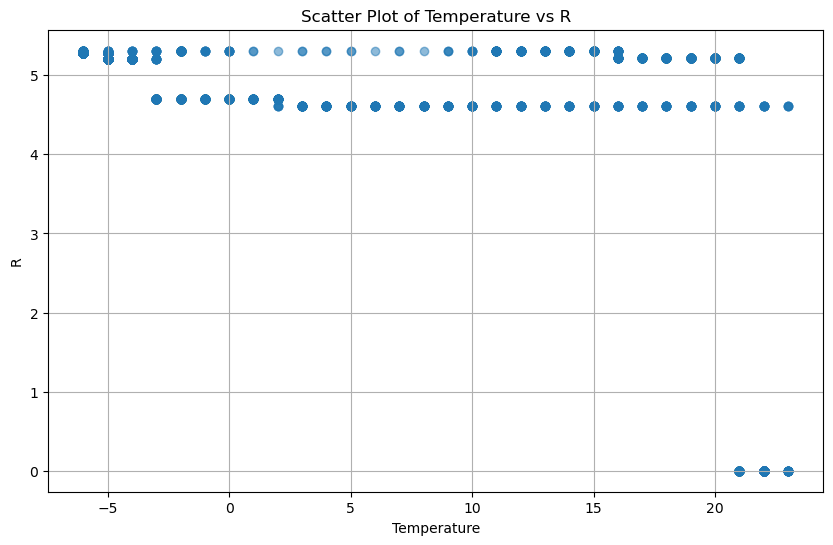

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read CSV file into DataFrame
df = pd.read_csv('smoothed_LOG_with_R.csv')

# Step 3: Plot Scatter Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(df['Temperature'], df['R'], alpha=0.5)  # Plot scatter plot
plt.title('Scatter Plot of Temperature vs R')  # Set title
plt.xlabel('Temperature')  # Set x-axis label
plt.ylabel('R')  # Set y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display plot


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model accuracy: 23.43%


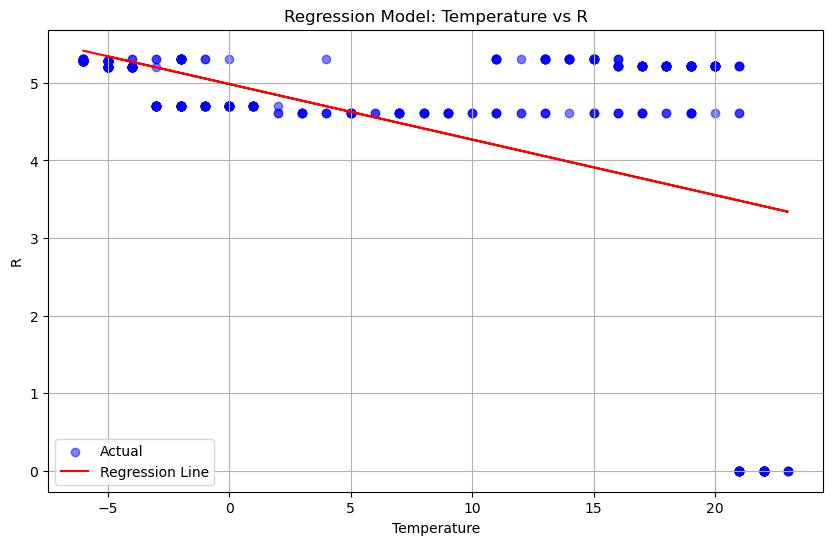

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 2: Read CSV file into DataFrame
df = pd.read_csv('smoothed_LOG_with_R.csv')

# Step 3: Split data into features (X) and target variable (y)
X = df[['Temperature']]
y = df['R']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

# Calculate model accuracy in percentage
model_accuracy = r_squared * 100

# Print model accuracy
print(f'Model accuracy: {model_accuracy:.2f}%')

# Step 7: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Model: Temperature vs R')
plt.xlabel('Temperature')
plt.ylabel('R')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 0.29831370797289486
R-squared: 0.8554990620281252
Model accuracy: 85.55%


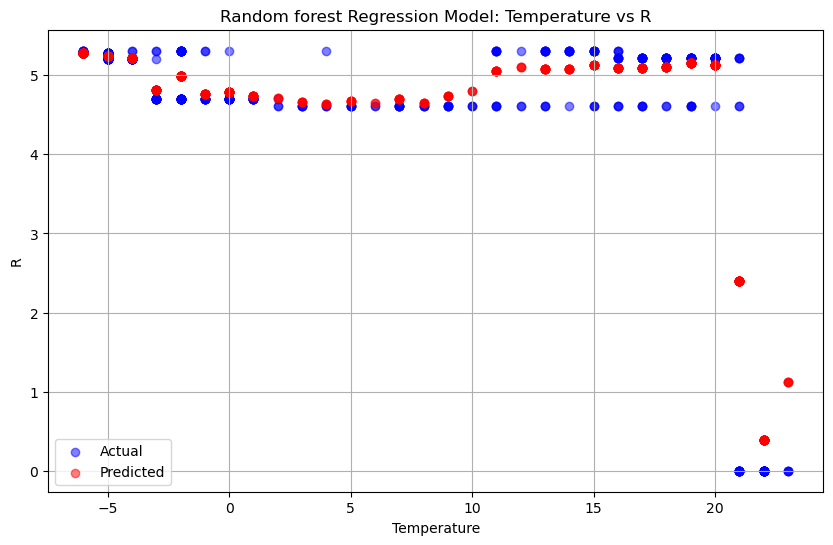

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Read CSV file into DataFrame
df = pd.read_csv('smoothed_LOG_with_R.csv')

# Step 3: Split data into features (X) and target variable (y)
X = df[['Temperature']]
y = df['R']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Calculate model accuracy in percentage
model_accuracy = r_squared * 100

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')
print(f'Model accuracy: {model_accuracy:.2f}%')

# Step 7: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Random forest Regression Model: Temperature vs R')
plt.xlabel('Temperature')
plt.ylabel('R')
plt.legend()
plt.grid(True)
plt.show()
